In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
oo = pd.read_csv('C:/Users/HARIKRISHNAN M/Downloads/Wine_clust.csv')
oo.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Missing Value detection

In [3]:
oo.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### No missing value found

In [4]:
oo.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
oo.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Scaling using Min Max Scaling

In [6]:
X = oo
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
X = minmax.fit_transform(X)

In [7]:
X = pd.DataFrame(X, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

## KMeans Clustering

C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


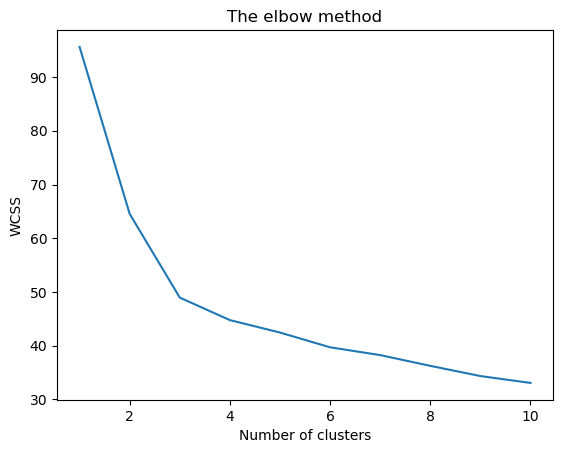

In [8]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

#### We get 3 clusters

In [9]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
print(np.unique(y_kmeans))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 0 0 0 1 0 1 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 2]


### Silhouette score

In [10]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(X,y_kmeans)
sil_kmeans

0.3008938518500134

### Davies Bouldin Index

In [11]:
from sklearn.metrics import davies_bouldin_score
dav_kmeans = davies_bouldin_score(X, y_kmeans)
dav_kmeans

1.3086395800210662

### Dunn's Index cannot be calculated

### calinski_harabasz_score

In [37]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X, y_kmeans)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 83.35112750771908


## Agglomeratice HC

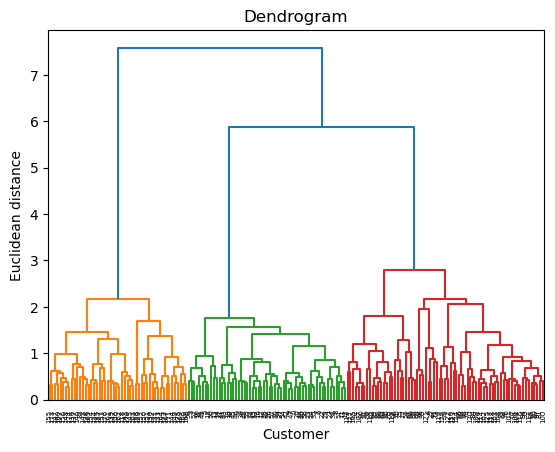

In [49]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show();

#### We get 3 clusters

In [110]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)
print(np.unique(y_hc))

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 2]


### Silhouette Score

In [51]:
from sklearn.metrics import silhouette_score
sil_hc = silhouette_score(X,y_hc)
sil_hc

0.2948290632158541

### Davies Bouldin Index

In [52]:
from sklearn.metrics import davies_bouldin_score
dav_hc = davies_bouldin_score(X, y_hc)
dav_hc

1.3183111453428589

### calinski_harabasz_score

In [101]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X, y_hc)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 81.32763860672199


### Dunn's Index

In [119]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_hc)
pred.columns = ['Type']

# we merge this dataframe with df
prediction = pd.concat([X, pred], axis = 1)
 
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]
k_list = [clus0.values, clus1.values,clus2.values]
k_list

# Dunn's Index
print("The Dunn's Index:", dunn(k_list))

The Dunn's Index: 0.4955365272645076


## DBSCAN Clustering

In [53]:
X.ndim #to check dimension for getting minpoints or min_samples

2

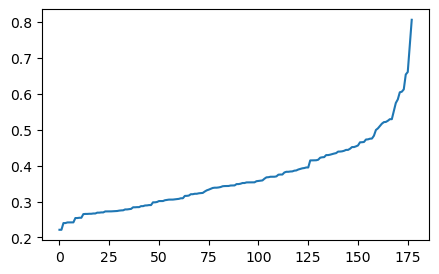

In [54]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=20) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show(); # showing the plot

In [55]:
from sklearn.cluster import DBSCAN
min_samples = range(10,21)
eps = np.arange(0.5,0.8, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))

# get the best silhouette score
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.26375348680377736
min_samples: 15
eps: 0.8000000000000003


In [112]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = eps, min_samples = min_samples) # fitting the model
y_db = dbscan.fit_predict(X)
print(y_db)
print(np.unique(y_db))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1]


### Silhouette Score

In [57]:
from sklearn.metrics import silhouette_score
sil_db = silhouette_score(X,y_db)
sil_db

0.26375348680377736

### Calinski Harabsz Score

In [102]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X, y_db)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 2.59174566182785


### Dunn's Index cannot be calculated as y_db has only -1

### Davies Bouldin Index

In [58]:
from sklearn.metrics import davies_bouldin_score
dav_db = davies_bouldin_score(X, y_db)
dav_db

0.604365155924742

### Plotting DBSCAN Clusters

Cluster labels [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
count per label Counter({0: 177, -1: 1})
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.324114


C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.771553
[t-SNE] KL divergence after 750 iterations: 0.352316


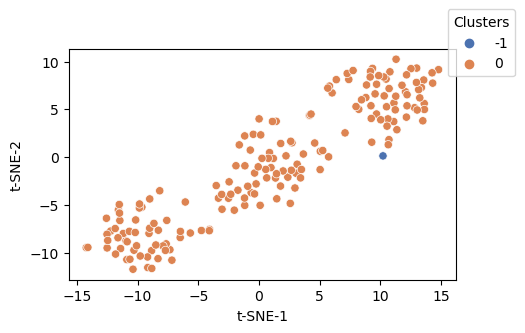

In [59]:
# for the plot
clusters = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
# get cluster labels
print("Cluster labels",clusters.labels_)

# check unique clusters
set(clusters.labels_)
# -1 value represents noisy points could not assigned to any cluster

from collections import Counter
count_per_label = Counter(clusters.labels_)
print("count per label",count_per_label)

# computing tsne but if feature is >50, go for PCA first then tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30)
tsne_results = tsne.fit_transform(X)

# for visualization of DBSCAN clustering
Xa = X.copy()
Xa['t-SNE-1'] = tsne_results[:,0]
Xa['t-SNE-2'] = tsne_results[:,1]
p = sns.scatterplot(data=Xa, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

# Trying Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X1 = stdsclr.fit_transform(X)

In [61]:
X1 = pd.DataFrame(X1, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

## KMeans Clustering

C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


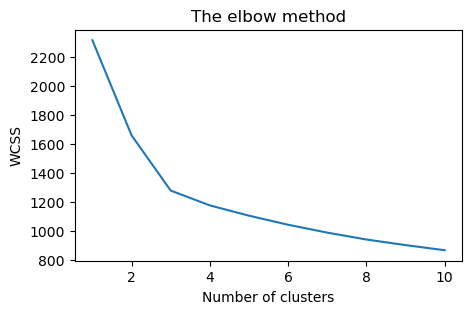

In [62]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

#### We get 3 clusters

In [99]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
print(y_kmeans1)
print(np.unique(y_kmeans1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 2]


### Silhouette Score

In [64]:
from sklearn.metrics import silhouette_score
sil_kmeans1 = silhouette_score(X1,y_kmeans1)
sil_kmeans1

0.2848589191898987

### Calinski Harabsz Score

In [103]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X1, y_kmeans1)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 70.94000800315122


### Dunn's Index

In [124]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_kmeans1)
pred.columns = ['Type']

# we merge this dataframe with df
prediction = pd.concat([X1, pred], axis = 1)
 
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]
k_list = [clus0.values, clus1.values,clus2.values]
k_list

# Dunn's Index
print("The Dunn's Index:", dunn(k_list))

The Dunn's Index: 0.11710725967659999


### Davies Bouldin Index

In [65]:
from sklearn.metrics import davies_bouldin_score
dav_kmeans1 = davies_bouldin_score(X1, y_kmeans1)
dav_kmeans1

1.3891879777181646

## Agglomerative HC

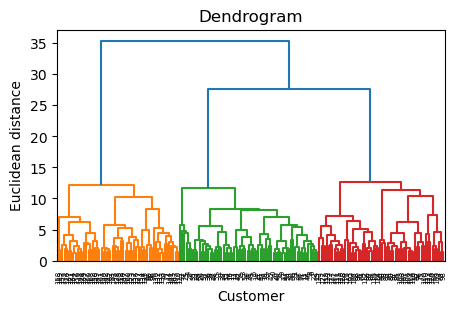

In [66]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show();

#### We get 3 clusters

In [116]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc.fit_predict(X1)
print(y_hc1)
print(np.unique(y_hc1))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 2]


### Silhouette Score

In [68]:
from sklearn.metrics import silhouette_score
sil_hc1 = silhouette_score(X1,y_hc1)
sil_hc1

0.2774439826952266

### Davies Bouldin Index

In [69]:
from sklearn.metrics import davies_bouldin_score
dav_hc1 = davies_bouldin_score(X1, y_hc1)
dav_hc1

1.4185919431857321

### Calinski Harabasz Score

In [104]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X1, y_hc1)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 67.6474675044098


### Dunn's Index

In [123]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_hc1)
pred.columns = ['Type']

# we merge this dataframe with df
prediction = pd.concat([X1, pred], axis = 1)
 
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]
k_list = [clus0.values, clus1.values,clus2.values]
k_list

# Dunn's Index
print("The Dunn's Index:", dunn(k_list))

The Dunn's Index: 0.11525663437599301


## DBSCAN

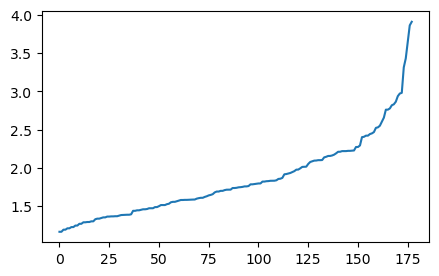

In [70]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=20) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X1) # fitting the data to the object
distances,indices=nbrs.kneighbors(X1) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show(); # showing the plot

In [71]:
min_samples = range(10,21)
eps = np.arange(3,4, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X1).labels_
        score = silhouette_score(X1, labels)
        output.append((ms, ep, score))

# get the best silhouette score
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.24617195380404538
min_samples: 13
eps: 3.6399999999999864


In [118]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = eps, min_samples = min_samples) # fitting the model
y_db1 = dbscan.fit_predict(X1)
print(y_db1)
print(np.unique(y_db1))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1]


### Silhouette Score

In [73]:
from sklearn.metrics import silhouette_score
sil_db1 = silhouette_score(X1,y_db1)
sil_db1

0.24617195380404538

### Calinski Harabasz Score

In [106]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X1, y_db1)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 4.459103685481698


### Dunn's Index cannot be calculated as array has only 1 cluster

### Davies Bouldin Score

In [74]:
from sklearn.metrics import davies_bouldin_score
dav_db1 = davies_bouldin_score(X1, y_db1)
dav_db1

2.93746919017647

### Plotting DBSCAN Clusters

Cluster labels [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
count per label Counter({0: 170, -1: 8})
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.625735


C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.000904
[t-SNE] KL divergence after 800 iterations: 0.376524


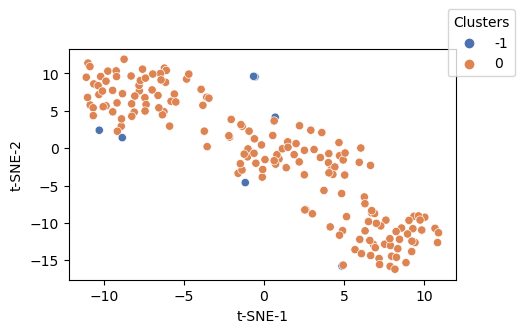

In [75]:
# for the plot
clusters = DBSCAN(eps=eps, min_samples=min_samples).fit(X1)
# get cluster labels
print("Cluster labels",clusters.labels_)

# check unique clusters
set(clusters.labels_)
# -1 value represents noisy points could not assigned to any cluster

from collections import Counter
count_per_label = Counter(clusters.labels_)
print("count per label",count_per_label)

# computing tsne but if feature is >50, go for PCA first then tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30)
tsne_results = tsne.fit_transform(X1)

# for visualization of DBSCAN clustering
X1a = X1.copy()
X1a['t-SNE-1'] = tsne_results[:,0]
X1a['t-SNE-2'] = tsne_results[:,1]
p = sns.scatterplot(data=X1a, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

# Trying Normalization

In [76]:
from sklearn import preprocessing
X2 = preprocessing.normalize(X)

In [77]:
X2 = pd.DataFrame(X2, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

## KMeans Clustering

C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


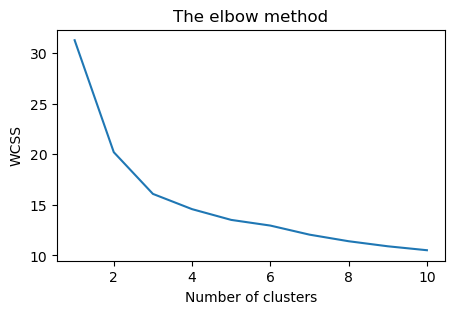

In [78]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

#### We get 2 clusters

In [100]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(X2)
print(y_kmeans2)
print(np.unique(y_kmeans2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1]


### Silhouette Score

In [80]:
from sklearn.metrics import silhouette_score
sil_kmeans2 = silhouette_score(X2,y_kmeans2)
sil_kmeans2

0.3370109424905078

### Davies Bouldin Index

In [81]:
from sklearn.metrics import davies_bouldin_score
dav_kmeans2 = davies_bouldin_score(X2, y_kmeans2)
dav_kmeans2

1.2559604108274824

### Calinski Harabasz Score

In [107]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X2, y_kmeans2)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 96.37944307387177


### Dunn's Index

In [122]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_kmeans2)
pred.columns = ['Type']

# we merge this dataframe with df
prediction = pd.concat([X2, pred], axis = 1)
 
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
k_list = [clus0.values, clus1.values]
k_list

# Dunn's Index
print("The Dunn's Index:", dunn(k_list))

The Dunn's Index: 0.9883902859246557


## Agglomerative HC

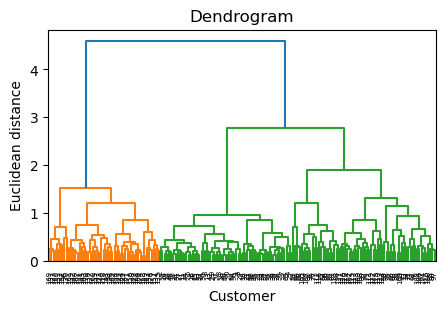

In [82]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show();

#### We get 2 clusters

In [127]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc.fit_predict(X2)
print(y_hc2)
print(np.unique(y_hc2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1]


### Silhouette Score

In [84]:
from sklearn.metrics import silhouette_score
sil_hc2 = silhouette_score(X2,y_hc2)
sil_hc2

0.33965299241766683

### Davies Bouldin Index

In [85]:
from sklearn.metrics import davies_bouldin_score
dav_hc2 = davies_bouldin_score(X2, y_hc2)
dav_hc2

1.1798234778040104

### Calinski Harabasz Index

In [108]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X2, y_hc2)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 90.06764373689694


### Dunn's Index

In [128]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_hc2)
pred.columns = ['Type']

# we merge this dataframe with df
prediction = pd.concat([X2, pred], axis = 1)
 
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
k_list = [clus0.values, clus1.values]
k_list

# Dunn's Index
print("The Dunn's Index:", dunn(k_list))

The Dunn's Index: 0.9883902859246557


## DBSCAN

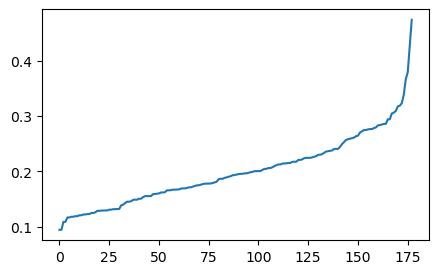

In [86]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=20) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X2) # fitting the data to the object
distances,indices=nbrs.kneighbors(X2) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show(); # showing the plot

In [87]:
min_samples = range(10,21)
eps = np.arange(0.3,0.47, 0.01) # returns array of ranging  with step of 0.01

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X2).labels_
        score = silhouette_score(X2, labels)
        output.append((ms, ep, score))

# get the best silhouette score
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.30021954123017863
min_samples: 18
eps: 0.36000000000000004


In [125]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = eps, min_samples = min_samples) # fitting the model
y_db2 = dbscan.fit_predict(X2)
print(y_db2)
print(np.unique(y_db2))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1  1  0  0  0  0  0  0  0 -1 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]
[-1  0  1]


### Plotting DBSCAN Clusters

Cluster labels [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1  1  0  0  0  0  0  0  0 -1 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]
count per label Counter({0: 119, 1: 49, -1: 10})
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.179401


C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.439007
[t-SNE] KL divergence after 1000 iterations: 0.372118


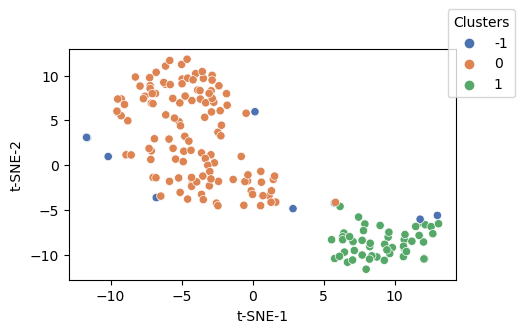

In [89]:
# for the plot
clusters = DBSCAN(eps=eps, min_samples=min_samples).fit(X2)
# get cluster labels
print("Cluster labels",clusters.labels_)

# check unique clusters
set(clusters.labels_)
# -1 value represents noisy points could not assigned to any cluster

from collections import Counter
count_per_label = Counter(clusters.labels_)
print("count per label",count_per_label)

# computing tsne but if feature is >50, go for PCA first then tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30)
tsne_results = tsne.fit_transform(X2)

# for visualization of DBSCAN clustering
X2a = X2.copy()
X2a['t-SNE-1'] = tsne_results[:,0]
X2a['t-SNE-2'] = tsne_results[:,1]
p = sns.scatterplot(data=X2a, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

### Instead of t-SNE, PCA can be also be used for plotting and we can see the difference. t-SNE plots good as compared to PCA.

#### See the point is both converges the data to 2 dimension so that we can plot but much of variance is lost in PCA a compared to t-SNE

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X2)
X2_pca = pca.fit_transform(X2)
X2_pca.shape

(178, 2)

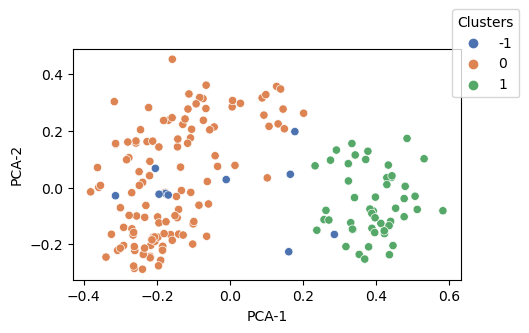

In [91]:
X2_pcaa = X2.copy()
X2_pcaa['PCA-1'] = X2_pca[:,0]
X2_pcaa['PCA-2'] = X2_pca[:,1]
p = sns.scatterplot(data=X2_pcaa, x="PCA-1", y="PCA-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

### Silhoutte Score

In [92]:
from sklearn.metrics import silhouette_score
sil_db2 = silhouette_score(X2,y_db2)
sil_db2

0.30021954123017863

### Davies Bouldin Index

In [93]:
from sklearn.metrics import davies_bouldin_score
dav_db2 = davies_bouldin_score(X2, y_db2)
dav_db2

2.1153146747328484

### Calinski Harabasz Score

In [109]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz index
score = calinski_harabasz_score(X2, y_db2)

print("Calinski-Harabasz index:", score)

Calinski-Harabasz index: 50.747385542185995


### Dunn's Index

In [126]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_db2)
pred.columns = ['Type']

# we merge this dataframe with df
prediction = pd.concat([X2, pred], axis = 1)
 
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == -1]
k_list = [clus0.values, clus1.values,clus2.values]
k_list

# Dunn's Index
print("The Dunn's Index:", dunn(k_list))

The Dunn's Index: 1.0157682469704792


#### So, normalization yields the best score as compared to both the scaling methods

## KMeans Clustering on Normalized data gave a Silhouette Score of 0.33 with Calinski Harabasz score of 96, both of which are comparatively better in this method as compared to other clustering methods. In addition, Dunn's Index and Davies Bouldin Index supported this finding